### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pandasql as ps
from pandasql import sqldf
import ast
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Importing data

In [2]:
merged_dataset = pd.read_csv(r"./new_dataset.csv")

# Machine Learning

## Creating ML dataset

In [3]:
final = merged_dataset.loc[:,['p_id', 'name', 'price', 'colour', 'brand', 'ratingCount', 'avg_rating',
       'Occasion', 'Print_Pattern_Type', 'Sustainable', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'brandID']]

## Pre-processing

In [4]:
le = preprocessing.LabelEncoder()

for i in final.columns:
        if final[i].dtype == object:
            final[i] = le.fit_transform(final[i])
        else:
            pass

In [5]:
final

,p_id,name,price,colour,brand,ratingCount,avg_rating,Occasion,Print_Pattern_Type,Sustainable,Knit_or_Woven,Fabric,Fabric_Purity,brandID
0,1518329.0,2986,899.0,47,220,1321,4.5,1,24,0,1,7,2,221
1,5829334.0,9059,1199.0,27,701,5462,4.3,0,43,0,1,7,2,702
2,10340119.0,4865,5799.0,33,362,145,4.1,1,22,0,1,8,2,363
3,10856380.0,9330,1499.0,2,719,9124,4.1,0,43,0,2,7,2,720
4,12384822.0,5811,1999.0,2,445,12260,4.1,0,43,0,1,7,2,446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14263,17029604.0,11238,3999.0,34,829,183,4.1,3,24,0,2,20,2,830
14264,17600212.0,5758,2050.0,3,438,183,4.1,0,37,0,1,7,2,439
14265,18159266.0,5655,1659.0,17,422,183,4.1,11,24,0,2,41,2,423
14266,18921114.0,4838,2399.0,36,361,183,4.1,0,24,0,2,71,2,362


### Normalisation

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_final = scaler.fit_transform(final)
dataset_final = pd.DataFrame(dataset_final, columns =[final.columns])
dataset_final

,p_id,name,price,colour,brand,ratingCount,avg_rating,Occasion,Print_Pattern_Type,Sustainable,Knit_or_Woven,Fabric,Fabric_Purity,brandID
0,-4.494969,-0.988180,-0.806271,1.654593,-1.046516,2.149149,1.238520,-0.209624,-0.880068,-0.131353,-0.425300,-1.139203,0.211874,-1.046516
1,-3.128086,0.530076,-0.689391,0.364468,0.623864,9.972420,0.618674,-0.554399,0.736992,-0.131353,-0.425300,-1.139203,0.211874,0.623864
2,-1.697860,-0.518428,1.102770,0.751506,-0.553389,-0.072577,-0.001173,-0.209624,-1.050285,-0.131353,-0.425300,-1.095824,0.211874,-0.553389
3,-1.534170,0.597826,-0.572511,-1.248188,0.686373,16.890753,-0.001173,-0.554399,0.736992,-0.131353,0.938029,-1.139203,0.211874,0.686373
4,-1.049549,-0.281928,-0.377711,-1.248188,-0.265153,22.815356,-0.001173,-0.554399,0.736992,-0.131353,-0.425300,-1.139203,0.211874,-0.265153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14263,0.423163,1.074828,0.401490,0.816012,1.068372,-0.000787,-0.001173,0.479925,-0.880068,-0.131353,0.938029,-0.575273,0.211874,1.068372
14264,0.604085,-0.295178,-0.357841,-1.183681,-0.289462,-0.000787,-0.001173,-0.554399,0.226341,-0.131353,-0.425300,-1.139203,0.211874,-0.289462
14265,0.781343,-0.320928,-0.510175,-0.280594,-0.345026,-0.000787,-0.001173,3.238124,-0.880068,-0.131353,0.938029,0.335690,0.211874,-0.345026
14266,1.022901,-0.525179,-0.221871,0.945025,-0.556862,-0.000787,-0.001173,-0.554399,-0.880068,-0.131353,0.938029,1.637067,0.211874,-0.556862


In [7]:
dataset_final.columns

MultiIndex([(              'p_id',),
            (              'name',),
            (             'price',),
            (            'colour',),
            (             'brand',),
            (       'ratingCount',),
            (        'avg_rating',),
            (          'Occasion',),
            ('Print_Pattern_Type',),
            (       'Sustainable',),
            (     'Knit_or_Woven',),
            (            'Fabric',),
            (     'Fabric_Purity',),
            (           'brandID',)],
           )

## Regression Modelling

>Selecting x & y variables

In [8]:
x_regression = dataset_final.loc[:,['p_id', 'colour', 'price', 'name','ratingCount',
       'Occasion', 'Print_Pattern_Type', 'Sustainable', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'avg_rating']]

In [9]:
y_regression = dataset_final.loc[:,['brandID']]

>Creating training & testing datasets

In [10]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_regression, y_regression, test_size=0.2, random_state=23)

print("Your independent training dataset contains ", x_reg_train.shape, " rows and columns.")
print("Your independent testing dataset contains ", x_reg_test.shape, " rows and columns.")
print("Your dependent training dataset contains ", y_reg_train.shape, " rows and columns.")
print("Your dependent testing dataset contains ", y_reg_test.shape, " rows and columns.")

Your independent training dataset contains  (11414, 12)  rows and columns.
Your independent testing dataset contains  (2854, 12)  rows and columns.
Your dependent training dataset contains  (11414, 1)  rows and columns.
Your dependent testing dataset contains  (2854, 1)  rows and columns.


### Linear Regression

>Training the model

In [11]:
LR = LinearRegression()

In [12]:
LR.fit(x_reg_train, y_reg_train)

C:\Users\percy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

>Testing the model

In [13]:
LR_predict = LR.predict(x_reg_test)
LR_predict

C:\Users\percy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[-0.52943253],
       [ 0.49049797],
       [-1.58021247],
       ...,
       [ 1.56929812],
       [ 0.67513539],
       [-1.27616356]])

### Bayesian Ridge Regression

In [14]:
BayRidge = BayesianRidge()
BayRidge.fit(x_reg_train, y_reg_train)

C:\Users\percy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\percy\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [15]:
BayRidge_predict = BayRidge.predict(x_reg_test)
BayRidge_predict

C:\Users\percy\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([-0.52942777,  0.49049334, -1.58019859, ...,  1.56928357,
        0.67513135, -1.27615234])

### Comparing Error Values

In [16]:
print("Linear Regressor MAE: ", metrics.mean_absolute_error(y_reg_test, LR_predict))
print("Bayesian Ridge Regressor MAE: ", metrics.mean_absolute_error(y_reg_test, BayRidge_predict))

Linear Regressor MAE:  0.049548262256945586
Bayesian Ridge Regressor MAE:  0.04954981324499537


## Classification Modelling

### Choosing the x & y variables

> To check for brand

In [17]:
x_brand = final.loc[:,['p_id', 'name', 'avg_rating', 'colour', 'ratingCount',
       'Occasion', 'Print_Pattern_Type', 'Sustainable', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'price']]

In [18]:
y_brand = final.loc[:,['brand']]

>To check for sustainability

In [19]:
x_sustain = final.loc[:,['p_id', 'brand','brandID', 'avg_rating', 'colour', 'ratingCount',
       'Occasion', 'Print_Pattern_Type', 'Knit_or_Woven',
       'Fabric', 'Fabric_Purity', 'price']]

In [20]:
y_sustain = final.loc[:,['Sustainable']]

### Creating training & testing datasets

> To check for brand

In [21]:
x_train_brand, x_test_brand, y_train_brand, y_test_brand = train_test_split(x_brand, y_brand, test_size=0.25, random_state=23)

print("Your independent training dataset contains ", x_train_brand.shape, " rows and columns.")
print("Your independent testing dataset contains ", x_test_brand.shape, " rows and columns.")
print("Your dependent training dataset contains ", y_train_brand.shape, " rows and columns.")
print("Your dependent testing dataset contains ", y_test_brand.shape, " rows and columns.")

Your independent training dataset contains  (10701, 12)  rows and columns.
Your independent testing dataset contains  (3567, 12)  rows and columns.
Your dependent training dataset contains  (10701, 1)  rows and columns.
Your dependent testing dataset contains  (3567, 1)  rows and columns.


>To check for sustainability

In [22]:
x_train_sustain, x_test_sustain, y_train_sustain, y_test_sustain = train_test_split(x_sustain, y_sustain, test_size=0.25, random_state=23)

print("Your independent training dataset contains ", x_train_sustain.shape, " rows and columns.")
print("Your independent testing dataset contains ", x_test_sustain.shape, " rows and columns.")
print("Your dependent training dataset contains ", y_train_sustain.shape, " rows and columns.")
print("Your dependent testing dataset contains ", y_test_sustain.shape, " rows and columns.")

Your independent training dataset contains  (10701, 12)  rows and columns.
Your independent testing dataset contains  (3567, 12)  rows and columns.
Your dependent training dataset contains  (10701, 1)  rows and columns.
Your dependent testing dataset contains  (3567, 1)  rows and columns.


### Random Forest Classifier for brand

In [23]:
rforest = RandomForestClassifier(n_estimators=60)
rforest.fit(x_train_brand, y_train_brand)

C:\Users\percy\AppData\Local\Temp\ipykernel_17644\1169656683.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(x_train_brand, y_train_brand)


RandomForestClassifier(n_estimators=60)

In [24]:
rforest_predict1 = rforest.predict(x_test_brand)

### Decision Tree Classifier for brand

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_brand, y_train_brand)

DecisionTreeClassifier()

In [26]:
dtree_predict1 = dtree.predict(x_test_brand)

### Comparing Accuracy Scores

In [27]:
print("Random Forest Classifier Accuracy:", round((metrics.accuracy_score(y_test_brand, rforest_predict1))*100,2),"%")
print("Decision Classifier Accuracy:", round((metrics.accuracy_score(y_test_brand, dtree_predict1))*100,2),"%")

Random Forest Classifier Accuracy: 73.59 %
Decision Classifier Accuracy: 90.61 %


### Decision Tree Classifier for sustainability

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_sustain, y_train_sustain)

DecisionTreeClassifier()

In [29]:
dtree_predict2 = dtree.predict(x_test_sustain)

### Random Forest Classifier for sustainability

In [30]:
rforest = RandomForestClassifier(n_estimators=60)
rforest.fit(x_train_sustain, y_train_sustain)

C:\Users\percy\AppData\Local\Temp\ipykernel_17644\123378999.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(x_train_sustain, y_train_sustain)


RandomForestClassifier(n_estimators=60)

In [31]:
rforest_predict2 = rforest.predict(x_test_sustain)

### Comparing Accuracy Scores

In [32]:
print("Random Forest Classifier Accuracy:", round((metrics.accuracy_score(y_test_sustain, rforest_predict2))*100,2),"%")
print("Decision Classifier Accuracy:", round((metrics.accuracy_score(y_test_sustain, dtree_predict2))*100,2),"%")

Random Forest Classifier Accuracy: 99.55 %
Decision Classifier Accuracy: 99.52 %


### Confusion matrices for Sustainability

In [33]:
merged_dataset['Sustainable'].unique()

array(['Regular', 'Sustainable'], dtype=object)

### Decision Tree 

In [34]:
dtree_cm=confusion_matrix(dtree_predict2, y_test_sustain)

In [35]:
dtree_cm_df= pd.DataFrame(dtree_cm, index=['Regular', 'Sustainable'],
                         columns=['Regular', 'Sustainable'])
print(dtree_cm_df)

             Regular  Sustainable
Regular         3503            6
Sustainable       11           47


### Random Forest

In [36]:
rforest_cm=confusion_matrix(rforest_predict2, y_test_sustain)

In [37]:
rforest_cm_df= pd.DataFrame(rforest_cm, index=['Regular', 'Sustainable'],
                         columns=['Regular', 'Sustainable'])
print(rforest_cm_df)

             Regular  Sustainable
Regular         3510           12
Sustainable        4           41


## Visualising the confusion matrices

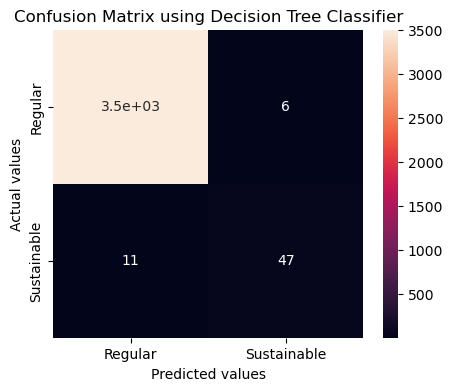

In [38]:
plt.figure(figsize=(5,4))
sns.heatmap(dtree_cm_df,annot=True)
plt.title('Confusion Matrix using Decision Tree Classifier')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

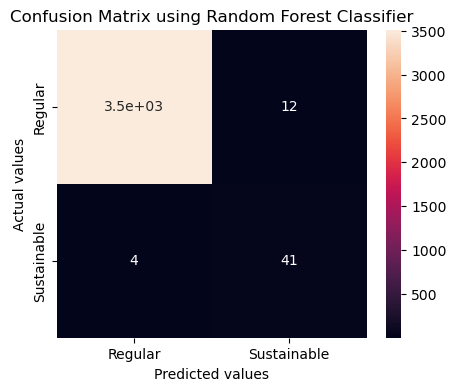

In [39]:
plt.figure(figsize=(5,4))
sns.heatmap(rforest_cm_df,annot=True)
plt.title('Confusion Matrix using Random Forest Classifier')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()